<a href="https://colab.research.google.com/github/jdmartinev/MachineLearning/blob/main/Clase01/Notebooks/b_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Clase 01 - $k$ Vecinos más cercanos ($k$NN)__

En este notebook, construiremos un clasificador de $k$ vecinos más cercanos para predecir el `Outcome type` de la base de datos.

1. <a href="#1">Leer la base de datos</a>
2. <a href="#2">Análisis exploratorio de datos</a>
3. <a href="#3">Selección de características para construir el modelo</a>
4. <a href="#4">Conjuntos de entrenamiento y prueba</a>
5. <a href="#5">Procesamiento de datos con `Pipeline`</a>
6. <a href="#6">Entrenar un clasificador</a>
7. <a href="#7">Validar el rendimiento del clasificador</a>
8. <a href="#8">Ideas de mejoramiento de los clasificadores</a>




## 1. <a name="1">Leer la base de datos</a>

Vamos a cargar la base de datos en un ``dataframe`` usando ``Pandas``

In [2]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL' -O data.csv

--2023-08-08 23:05:16--  https://docs.google.com/uc?export=download&id=1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL
Resolving docs.google.com (docs.google.com)... 74.125.143.100, 74.125.143.138, 74.125.143.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.143.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/koa2eebj9ikmh5jab68kf4tphpel7sna/1691535900000/02109188480849179502/*/1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL?e=download&uuid=dbc79b21-e6c7-4f0b-a139-00a2061f84e4 [following]
--2023-08-08 23:05:19--  https://doc-0g-bk-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/koa2eebj9ikmh5jab68kf4tphpel7sna/1691535900000/02109188480849179502/*/1w5IeXLpWOCC5TNNPG3hojbvxi_2rd7gL?e=download&uuid=dbc79b21-e6c7-4f0b-a139-00a2061f84e4
Resolving doc-0g-bk-docs.googleusercontent.com (doc-0g-bk-docs.googleusercontent.com)... 142.251.31.132, 2a00:1450:

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Carga el archivo csv
df = pd.read_csv('data.csv')
print(f'El tamaño del dataset es: {df.shape}')

El tamaño del dataset es: (95485, 13)


## 2. <a name="2">Análisis exploratorio de datos</a>
Vamos a obtener el número de filas (ejemplos), número de columnas (características) y algunos estadísticos simples de la base de datos

In [ ]:
# Imprime las primeras cinco filas
# NaN significa que hay valores faltantes
df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [ ]:
# Tipos de datos y cantidad de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [ ]:
# Calcula estadísticas básicas para las columnas numéricas
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


Separemos las características de la variable objetivo

In [ ]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


In [ ]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model target:  Outcome Type


Podemos explorar más a fondo el conjunto de características, separandolas entre características numéricas y categóricas. Tenga en cuenta que algunas características con valores enteros, a pesar de ser numéricas, pueden ser categóricas, y algunas variables categóricas pueden ser texto.

In [ ]:
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)

Numerical columns: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


Distribución de la variable objetivo

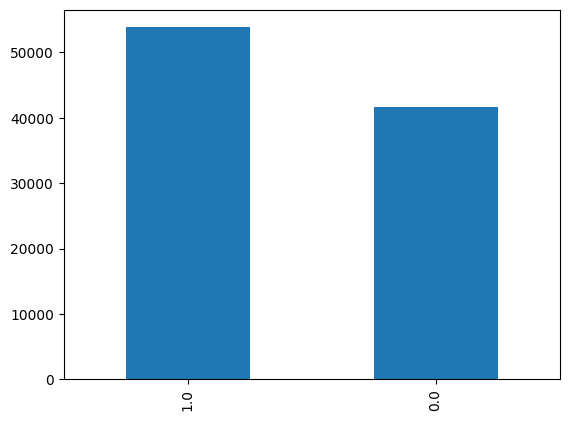

In [ ]:
df[model_target].value_counts().plot.bar()
plt.show()

A partir de esta figura podemos identificar si estamos tratando con conjuntos de datos desbalanceados - esto significa que una o varias clases tiene muchas más muestras que las demás.

Es muy recomendable manejar el desbalance de clases, ya que el rendimiento del modelo puede verse afectado. En particular, el modelo puede no funcionar bien para las clases infrecuentes, ya que no hay suficientes muestras para aprender patrones, por lo que sería difícil para el clasificador identificar esos patrones.

Existen varias formas de tratar el desbalance de clases, reduciendo la clase dominante o aumentando la clase poco frecuente. Sin embargo, solo debemos corregir el desbalance en el conjunto de entrenamiento, sin cambiar los conjuntos de validación y prueba, ya que estos deben seguir la distribución original. Realizaremos esta tarea después de la división entre entrenamiento y prueba.

## 3. <a name="3">Selección de características para construir el modelo</a>

Solo se utilizarán las características numéricas para construir el modelo en esta primera solución.

Miremos los histogramas de las características numéricas

Age upon Intake Days


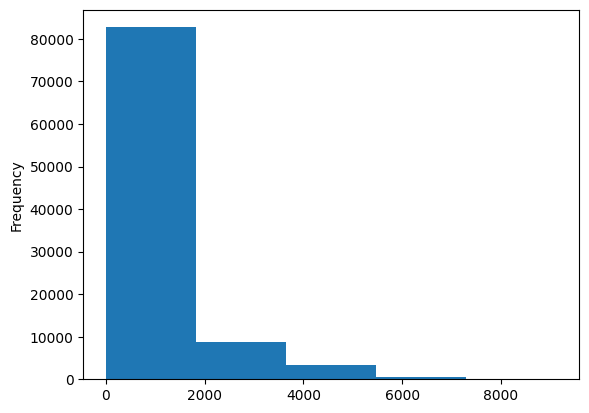

Age upon Outcome Days


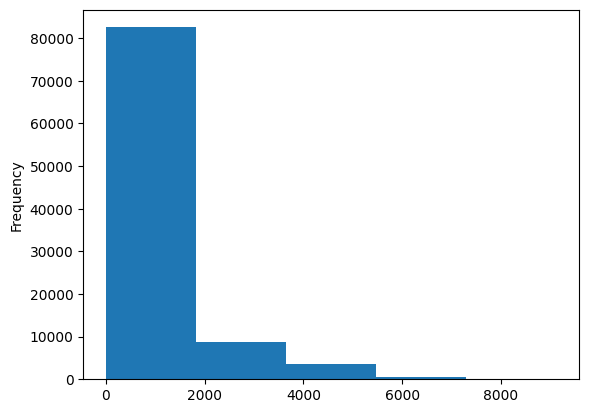

In [ ]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

Si para algunos histogramas los valores están fuertemente ubicados en el primer intervalo, es bueno revisar los valores atípicos, ya sea verificando los valores mínimos y máximos de esas características particulares y/o explorando rangos de valores.

In [ ]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())


Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


Con la función value_counts() se puede incrementar el número de bins de los histogramas a 10 para tener una vista más refinada de las características numéricas.

In [ ]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Intake Days, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: Age upon Outcome Days, dtype: int64


Si se identifican outliers (valores muy probablemente erróneos) eliminarlos podría mejorar los histogramas y, posteriormente, el rendimiento general del modelo. Si bien una buena regla general es que cualquier valor que no esté en el rango de (Q1 - 1.5 IQR) y (Q3 + 1.5 IQR) es un outlier, también deben considerarse otras reglas para eliminar outliers. Por ejemplo, eliminar cualquier valor en el 1% superior.

Si hay algún valor faltante o outlier, como una solución rápida, podemos aplicar la imputación por la media. Esto reemplazará los valores faltantes con el valor medio de la columna correspondiente.

__Nota__: La forma estadísticamente correcta de realizar la imputación por media/moda antes de entrenar un modelo de ML es calcular las medias por columna solo en los datos de entrenamiento, y luego usar estos valores para imputar los datos faltantes tanto en el conjunto de entrenamiento como en el de prueba. Por lo tanto, necesitarás dividir tu conjunto de datos primero.

## 4. <a name="4">Conjuntos de entrenamiento y prueba</a>

Dividamos nuestro conjunto de datos en 90\% para entrenamiento y 10\% para prueba usando la función de `sklearn` `train_test_split()`.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.1, shuffle=True, random_state=23)

Manejo de desbalance de muestras

In [ ]:
print('Training set shape:', train_data.shape)

print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))
print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))

print('Class 0 samples in the test set:', sum(test_data[model_target] == 0))
print('Class 1 samples in the test set:', sum(test_data[model_target] == 1))

Training set shape: (85936, 13)
Class 0 samples in the training set: 37499
Class 1 samples in the training set: 48437
Class 0 samples in the test set: 4132
Class 1 samples in the test set: 5417


__Nota importante:__ Organizamos el desbalance únicamente en el conjunto de entrenamiento. No debemos modificar el desbalance en los conjuntos de validación y prueba, dado que estos deben seguir la distribución original de los datos

In [ ]:
from sklearn.utils import shuffle

In [ ]:
class_0_no = train_data[train_data[model_target] == 0]
class_1_no = train_data[train_data[model_target] == 1]

upsampled_class_0_no = class_0_no.sample(n=len(class_1_no), replace=True, random_state=42)

train_data = pd.concat([class_1_no, upsampled_class_0_no])
train_data = shuffle(train_data)

In [ ]:
print('Training set shape:', train_data.shape)

print('Class 1 samples in the training set:', sum(train_data[model_target] == 1))
print('Class 0 samples in the training set:', sum(train_data[model_target] == 0))

Training set shape: (96874, 13)
Class 1 samples in the training set: 48437
Class 0 samples in the training set: 48437


__Nota importante 2:__ No siempre es necesario hacer balance de clases, en alguas ocaciones, los pocos datos de una clase pueden hacer que el clasificador aprenda los patrones de dicha clase.

## 5. <a name="5">Procesamiento de datos con ``Pipeline``</a>

En un flujo de trabajo típico de aprendizaje automático, se necesita aplicar transformaciones de datos, como imputación y escalamiento, al menos dos veces. Primero, en el conjunto de datos de entrenamiento con ``.fit()`` y ``.transform()``, al preparar los datos para entrenar el modelo. Y de nuevo, en cualquier nuevo dato en el que se quiera hacer predicción, con ``.transform()``. ``Pipeline`` de ``Scikit-learn`` es una herramienta que simplifica este proceso al hacer cumplir la implementación y el orden de los pasos de procesamiento de datos.

Se contruye un pipeline para imputar los valores faltantes con la media usando el ``SimpleImputer`` de ``sklearn``, se escalan las características numéricas para tener órdenes de magnitud similares llevándolas al rango de 0-1 con el ``MinMaxScaler`` de ``sklearn``, y finalmente se entrena un estimador en el conjunto de datos imputados y escalados.

![Scaling](https://drive.google.com/uc?id=1Ne1b8pelUy0BaeLOjWl3DN7vc-rKEhBs)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from sklearn import set_config
set_config(display='diagram')

In [ ]:
### PIPELINE ###
################
# Pipeline diseñado con las transformaciones de los datos y el estimador
# Para cada etapa se especifica: un nombre, la transformación/estimador con sus parámetros
classifier = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler()),
    ('estimator', KNeighborsClassifier(n_neighbors = 3))
])

# Visualizar el Pipeline
# Necesario cuando tenemos Pipelines complejos
classifier

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

## 6. <a name="6">Entrenar un clasificador</a>

In [ ]:
# Utilizar datos de entrenamiento para entrenar el clasificador
X_train = train_data[numerical_features_all]
y_train = train_data[model_target]

# Ajustar el clasificador a los datos de entrenamiento
# Los datos de entrenamiento pasan por el Pipeline, primero se imputan, después se escalan y finalmente se usan para ajustar el clasificador.
classifier.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('estimator', KNeighborsClassifier(n_neighbors=3))])

## 7. <a name="7">Evaluar el clasificador</a>

Se evalúa el rendimiento del clasificador entrenado en los datos de prueba (test). Se usa ``predict()``

Primero, se evalúa como se asjustó el modelo para los datos de entrenamiento

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
train_predictions = classifier.predict(X_train)

print('Rendimiento del modelo en el conjunto de entrenamiento:')
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Train accuracy:", accuracy_score(y_train, train_predictions))

Rendimiento del modelo en el conjunto de entrenamiento:
[[30282 18155]
 [19721 28716]]
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     48437
         1.0       0.61      0.59      0.60     48437

    accuracy                           0.61     96874
   macro avg       0.61      0.61      0.61     96874
weighted avg       0.61      0.61      0.61     96874

Train accuracy: 0.6090178995396082


Ahora, se evalúa el rendimiento del clasificador en el conjunto de prueba

In [ ]:
X_test = test_data[numerical_features_all]
y_test = test_data[model_target]

test_predictions = classifier.predict(X_test)

print('Model performance on the test set:')
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Test accuracy:", accuracy_score(y_test, test_predictions))


Model performance on the test set:
[[2606 1526]
 [2190 3227]]
              precision    recall  f1-score   support

         0.0       0.54      0.63      0.58      4132
         1.0       0.68      0.60      0.63      5417

    accuracy                           0.61      9549
   macro avg       0.61      0.61      0.61      9549
weighted avg       0.62      0.61      0.61      9549

Test accuracy: 0.6108493035919992


## 8. <a name="8">Ideas de mejoramiento de los clasificadores</a>
Para mejorar el rendimiento de cualquier clasificador/regresor, podemos sintonizar sus hiperparámetros. En este caso, el hiperparámetro del algoritmo $k-$NN es el número de vecinos $k$